In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [70]:
df = pd.read_csv('test_dataset.csv')
df.head()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,12,0.75,4.08,NaN,1080,0,0.0,0,0,9.0,...,1,0,1,0,0,1,0,0,0,0
1,4,0.75,4.15,NaN,2400,0,0.0,0,0,20.0,...,0,1,0,0,0,0,1,0,0,0
2,3,0.70,30.10,1057.0,0,40,0.0,0,1,58.0,...,0,0,0,1,0,0,0,0,0,1
3,7,0.70,3.94,NaN,2160,0,0.0,0,0,18.0,...,0,0,1,0,0,0,1,0,0,0
4,5,0.50,4.15,NaN,1440,0,0.0,0,0,8.0,...,0,0,1,0,0,0,1,0,0,0


In [71]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   180 non-null    int64  
 1   targeted_productivity  180 non-null    float64
 2   smv                    180 non-null    float64
 3   wip                    97 non-null     float64
 4   over_time              180 non-null    int64  
 5   incentive              180 non-null    int64  
 6   idle_time              180 non-null    float64
 7   idle_men               180 non-null    int64  
 8   no_of_style_change     180 non-null    int64  
 9   no_of_workers          180 non-null    float64
 10  month                  180 non-null    int64  
 11  quarter_Quarter1       180 non-null    int64  
 12  quarter_Quarter2       180 non-null    int64  
 13  quarter_Quarter3       180 non-null    int64  
 14  quarter_Quarter4       180 non-null    int64  
 15  quarte

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,180.000000,180.000000,180.000000,97.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,6.333333,0.723333,14.563167,1235.061856,4762.500000,24.205556,1.666667,0.205556,0.094444,33.27500,...,0.038889,0.244444,0.216667,0.538889,0.194444,0.177778,0.200000,0.172222,0.150000,0.105556
std,3.423546,0.100751,10.943990,2094.627651,3737.737773,29.280515,22.360680,2.757817,0.345720,22.28236,...,0.193869,0.430956,0.413123,0.499876,0.396876,0.383392,0.401116,0.378627,0.358067,0.308125
min,1.000000,0.350000,2.900000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.700000,4.080000,808.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.750000,14.990000,1067.000000,3600.000000,0.000000,0.000000,0.000000,0.000000,33.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.800000,23.057500,1227.000000,7020.000000,46.250000,0.000000,0.000000,0.000000,57.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,0.800000,48.680000,21385.000000,25920.000000,113.000000,300.000000,37.000000,2.000000,59.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
df.isnull().sum().sum()

np.int64(83)

In [73]:
for col in df.select_dtypes(include=['int64','float64']):
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_23744\4167980113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [74]:
df.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

In [75]:
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [76]:
X = df.drop("team", axis=1)
y = df["team"]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [78]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [79]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [80]:
y_pred = model.predict(X_test_scaled)


In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2222222222222222

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         4
           6       1.00      0.50      0.67         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.25      1.00      0.40         1
          11       0.00      0.00      0.00         4
          12       0.40      0.67      0.50         3

    accuracy                           0.22        36
   macro avg       0.24      0.24      0.19        36
weighted avg       0.32      0.22      0.21        36



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

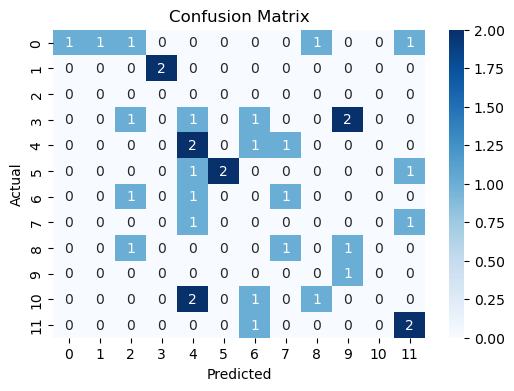

In [82]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [83]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
1,smv,0.145807
8,no_of_workers,0.123986
3,over_time,0.121443
0,targeted_productivity,0.091717
2,wip,0.080835
4,incentive,0.066587
9,month,0.051423
20,day_Sunday,0.030804
11,quarter_Quarter2,0.030309
18,day_Monday,0.029889


In [84]:
import joblib

joblib.dump(model, "employee_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

In [85]:
import pandas as pd
import joblib

model = joblib.load("employee_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")
print(scaler.feature_names_in_)
print(feature_columns)


['targeted_productivity' 'smv' 'wip' 'over_time' 'incentive' 'idle_time'
 'idle_men' 'no_of_style_change' 'no_of_workers' 'month'
 'quarter_Quarter1' 'quarter_Quarter2' 'quarter_Quarter3'
 'quarter_Quarter4' 'quarter_Quarter5' 'department_finishing'
 'department_finishing ' 'department_sweing' 'day_Monday' 'day_Saturday'
 'day_Sunday' 'day_Thursday' 'day_Tuesday' 'day_Wednesday']
['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_finishing ', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']


In [86]:
new_df = pd.DataFrame([new_employee])

# Missing columns add karo
for col in feature_columns:
    if col not in new_df.columns:
        new_df[col] = 0

# Column order same karo
new_df = new_df[feature_columns]


In [87]:
new_employee = {
    "targeted_productivity": 0.8,
    "smv": 26,
    "wip": 1200,
    "over_time": 3000,
    "incentive": 100,
    "idle_time": 10,
    "idle_men": 5,
    "no_of_workers": 35,
    "no_of_style_change": 1,
    "month": 6,

    # ONE-HOT columns (VERY IMPORTANT)
    "department_finishing": 1,
    "department_sewing": 0,

    "quarter_Quarter1": 0,
    "quarter_Quarter2": 1,
    "quarter_Quarter3": 0,
    "quarter_Quarter4": 0,
    "quarter_Quarter5": 0,

    "day_Monday": 1,
    "day_Tuesday": 0,
    "day_Wednesday": 0,
    "day_Thursday": 0,
    "day_Saturday": 0,
    "day_Sunday": 0
}


In [88]:
new_scaled = scaler.transform(new_df)

prediction = model.predict(new_scaled)
probability = model.predict_proba(new_scaled)


In [89]:
if prediction[0] == 1:
    print("✅ High Performance Employee")
else:
    print("⚠️ Low Performance Employee")

print("Probability:", probability)


✅ High Performance Employee
Probability: [[0.13945833 0.053125   0.11141667 0.08047222 0.015      0.122375
  0.0855     0.06077778 0.07048611 0.10138889 0.025      0.135     ]]


In [90]:
import numpy as np

predicted_class = model.classes_[np.argmax(probability)]
confidence = np.max(probability)

print("Predicted Performance Class:", predicted_class)
print("Confidence:", confidence)


Predicted Performance Class: 1
Confidence: 0.13945833333333335
